# Introduction

# I. About the Business

## Planted Forests in Brazil

## *Context*

Planted forests constitutes very important resources to human life [<sup>1</sup>](#ref1). Its implications going even the environment preservation to economic strategies for international business.

Instead deforest nature forests to extract necessary resources, we can plant new forests (hence the name planted forests). This practice enables the preservation of the biodiversity and works as a more sustainable solution in face of the challenges of resources extraction in the current world. It is economic and ecological benefits of planted forests [<sup>1</sup>](#ref1):

1. Water flow regulation;
2. Climate control;
3. Carbon stocks formation;
4. Soil conservation;
5. Seed dispersion;
6. Nutrient cycling;
7. Ecological corridors formation;
8. Cultural, scientific, recreational and educational activities.

Our planet has 4.06 billions acres of forests. More than half of the forests are in five countries: [<sup>2</sup>](#ref2): 

1. Russia (815 millions acres). 
2. **Brazil (497 millions)**. 
3. Canada (347 millions).
4. United States (310 millions).
5. China (220 millions).

Just 7% of those forests are planted. From these planted forests, **most are in Brazil** [<sup>2</sup>](#ref2).

The history of planted forests in Brazil starts on 1903 with the planting of Eucalyptus seedlings. In 1947 it starts the Pine planting, useful to cellulose and paper planting [<sup>3</sup>](#ref3). The main forest products arising of planted forests feed several industries. Follow some examples [<sup>4</sup>](#ref4): panels, cellulose, paper, lumber, charcoal, and energy.

The main data that we have (open to public) comes from two sources:

1. Indústria Brasileira de Árvores, or Brazilian Tree Industry (**Ibá** - treaty in this project as **IBA**);
2. Instituto Brasileiro de Geografia e Estatística, or Brazilian Institute of Geography and Statistics (**IBGE**).

On the National Forest Information System (**SNIF**) website [<sup>3</sup>](#ref3) we have at our disposal the relevant data of the planted forests in Brazil in the period of **2006 to 2016 (IBA)** and **2013 to 2019 (IBGE)**. Both data sets has information about the carried out planting (in acres) in all regions of Brazil. It is worth pointing out that there is a great interactive panel on this same website that allows to interact with data in very intuitive way. 

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/Eucalyptus_tree.jpg/200px-Eucalyptus_tree.jpg" alt="Example of Eucalyptus" title="Example of Eucalyptus" hspace="5" width="300"/>

<img align="center" src="https://upload.wikimedia.org/wikipedia/commons/9/97/Slash_pine.jpg" alt="Example of Pine" title="Example of Pine" hspace="5" width="300"/>

# II. Business Question

Given the exposed context, we can make the following question about the planted forests in Brazil:

**Which will be the estimated planted, in acres, for the next years to come?**

# III. Gathering and Nature of Data

It gathered the data directly from the web page dedicated to the planted forests in Brazil, on SNIF [<sup>3</sup>](#ref3). It is about **two CSV files**, downloaded and used henceforward.

**Note**: it was chosen to combine the files according to the column Ano (Year).

It was consolidate the data about the years from 2006 to 2016, from IBA, with it 2017 to 2019, from IBGE.

Nevertheless, the code of this project is ready for perform the study of each data base (IBA, IBGE, or both), whether desired. 

# Planted Forests in Brazil Forecast

## Summary

- [1. Import of the Libraries](#1.-Import-of-the-Libraries)
- [2. Data Preparation](#2.-Data-Preparation)
- [3. Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
- [4. Modelling - ARIMA](#4.-Modelling---ARIMA)
- [5. Modelling - Linear Regression](#5.-Modelling---Linear-Regression)
- [6. Conclusions](#6.-Conclusions)
- [7. References](#7.-References)
- [Functions utilized in this project](#Functions-utilized-in-this-project)

# 1. Import of the Libraries

In [23]:
import numpy as np, pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import requests
import geopandas as gpd
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

# 2. Data Preparation

In [32]:
# read and concatenate data
data_IBA = pd.read_csv('FP_IBA.csv', delimiter=';')
data_IBGE = pd.read_csv('FP_IBGE.csv', delimiter=';')

# prepare and get relevant columns - IBA
data_IBA['Ano'] = data_IBA['Ano'].str.slice(start=6)
data_IBA.rename(index=str, columns={'Área (ha)': 'Área'}, inplace=True)
data_IBA = data_IBA[['Ano', 'Cultura', 'Estado',  'Área']]
data_IBA['Ano'] = data_IBA['Ano'].astype(int)
data_IBA = data_IBA.fillna(0)

# prepare and get relevant columns - IBGE
data_IBGE.rename(index=str, columns={'Espécie florestal': 'Cultura', 'Nome UF': 'Estado', 'Área (ha)': 'Área'}, inplace=True)
data_IBGE = data_IBGE[['Ano PEVS', 'Cultura', 'Estado', 'Área']]
data_IBGE.rename(index=str, columns={'Ano PEVS': 'Ano'}, inplace=True)
data_IBGE = data_IBGE.fillna(0)

# prepare and get relevant columns - IBA and IBGE

# get IBGE data and concat to IBA data
data_IBGE = data_IBGE.loc[data_IBGE['Ano'] > 2016]

frames_to_concat = [data_IBA, data_IBGE]
data_IBA_and_IBGE = pd.concat(frames_to_concat)

# convert "Área"to millions
data_IBA['Área'] = data_IBA['Área'] / 10
data_IBGE['Área'] = data_IBGE['Área'] / 10
data_IBA_and_IBGE['Área'] = data_IBA_and_IBGE['Área'] / 10

data_IBA_and_IBGE.tail(7)

#data_IBA.describe().transpose()
#data_IBA.tail()
#data_IBGE.head()
#data_IBGE.tail()
#data_IBGE.describe().transpose()

,Ano,Cultura,Estado,Área
77126,2019,Pinus,Paraná,3537.8
77127,2019,Pinus,Rio Grande do Sul,3675.0
77128,2019,Pinus,Rio Grande do Sul,3675.0
77129,2019,Pinus,Paraná,4076.8
77130,2019,Pinus,Santa Catarina,4500.0
77131,2019,Pinus,Rio Grande do Sul,5600.0
77132,2019,Pinus,Paraná,6945.0


# 3. Exploratory Data Analysis (EDA)

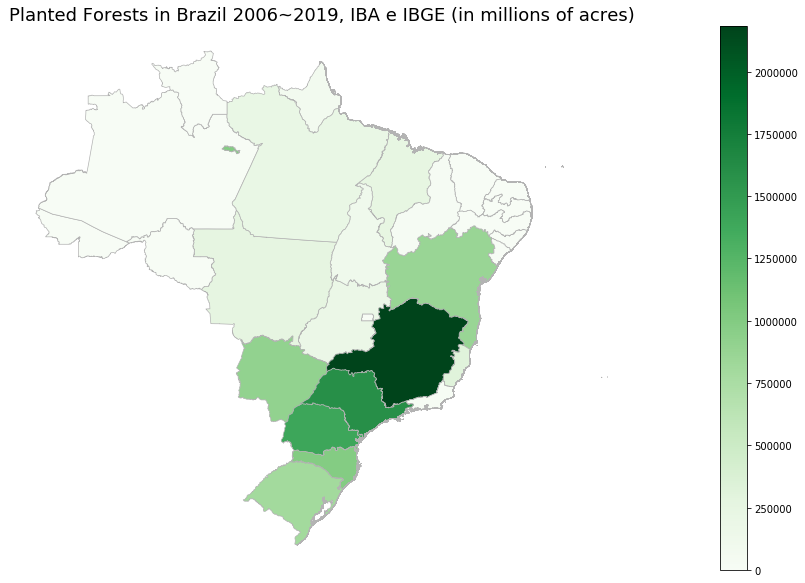

In [33]:
getBrazilMap(data_IBA_and_IBGE, 'IBA e IBGE')

Planted forests in Brazil: Area, in millions of acres, per Year (IBA e IBGE)
                   Área
Ano                    
2006           574883.2
2007           595282.3
2008           628838.9
2009           645364.4
2010           711969.9
2011           718088.7
2012           738807.7
2013           760097.5
2014           773617.1
2015           780104.7
2016           784747.8
2017           976378.3
2018           986495.0
2019           998309.5
Grand Total  10672985.0
---


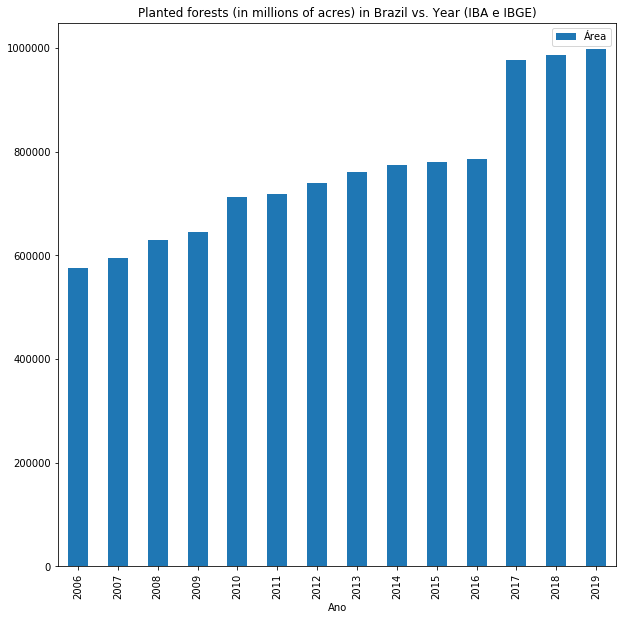

In [34]:
summarizeDataByYear(data_IBA_and_IBGE, 'IBA e IBGE')

Planted forests in Brazil: Area, in millions of acres, per Culture (IBA e IBGE)
                       Área
Cultura                    
Eucalipto         7723241.6
Outras culturas    379753.9
Outras espécies    113672.9
Pinus             2456316.6
Grand Total      10672985.0
---


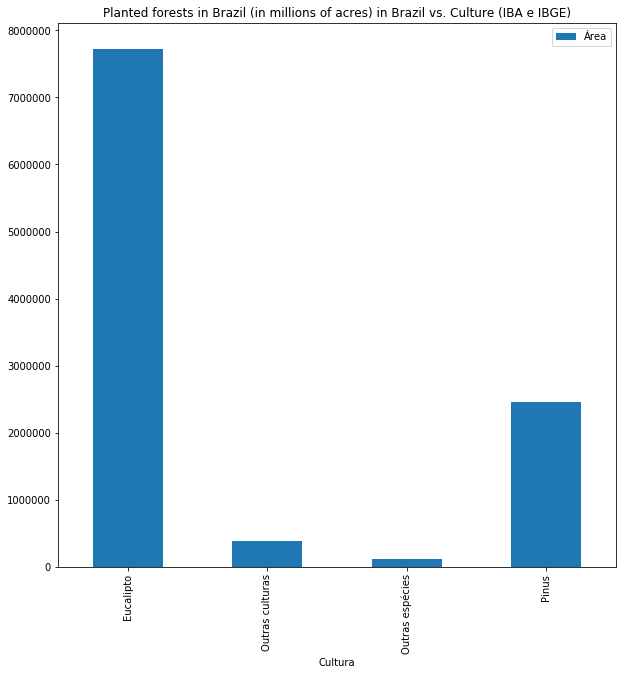

In [35]:
summarizeDataByCulture(data_IBA_and_IBGE, 'IBA e IBGE')

Planted forests in Brazil: Area, in millions of acres, per State (IBA e IBGE)
                           Área
Estado                         
Rio Grande do Norte        10.2
Ceará                     178.8
Pernambuco               1026.7
Distrito Federal         1254.0
Sergipe                  1581.3
Paraíba                  1795.9
Alagoas                  6140.8
Roraima                  7201.5
Rondônia                 8007.2
Rio de Janeiro           9944.1
Outros                  22493.1
Piauí                   31034.6
Amapá                   83449.1
Tocantins              124470.1
Goiás                  193824.9
Pará                   215933.1
Maranhão               254991.9
Mato Grosso            257746.5
Espírito Santo         321769.1
Não informado          379753.9
Rio Grande do Sul      802740.8
Bahia                  864950.7
Mato Grosso do Sul     905274.5
Santa Catarina         994318.7
Paraná                1399843.0
São Paulo             1601188.9
Minas Gerais          2182

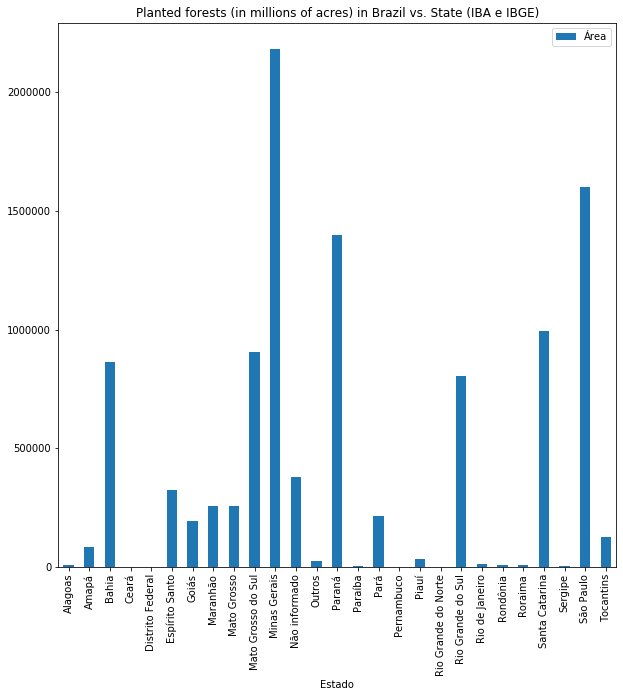

In [36]:
summarizeDataByState(data_IBA_and_IBGE, 'IBA e IBGE')

Planted forests in Brazil: Area, in millions of acres, per Culture and Year (IBA e IBGE)
                               Área
(Eucalipto, 2006)          386254.6
(Eucalipto, 2007)          407816.7
(Eucalipto, 2008)          445606.9
(Eucalipto, 2009)          465892.4
(Eucalipto, 2010)          490095.0
(Eucalipto, 2011)          504971.2
(Eucalipto, 2012)          530416.3
(Eucalipto, 2013)          547317.6
(Eucalipto, 2014)          555865.3
(Eucalipto, 2015)          563060.7
(Eucalipto, 2016)          567378.4
(Eucalipto, 2017)          743275.3
(Eucalipto, 2018)          753672.8
(Eucalipto, 2019)          761618.4
(Outras culturas, 2010)     46239.0
(Outras culturas, 2011)     48928.2
(Outras culturas, 2012)     52113.1
(Outras culturas, 2013)     55765.3
(Outras culturas, 2014)     58852.1
(Outras culturas, 2015)     58920.1
(Outras culturas, 2016)     58936.1
(Outras espécies, 2017)     37997.1
(Outras espécies, 2018)     36945.1
(Outras espécies, 2019)     38730.7
(Pinus, 200

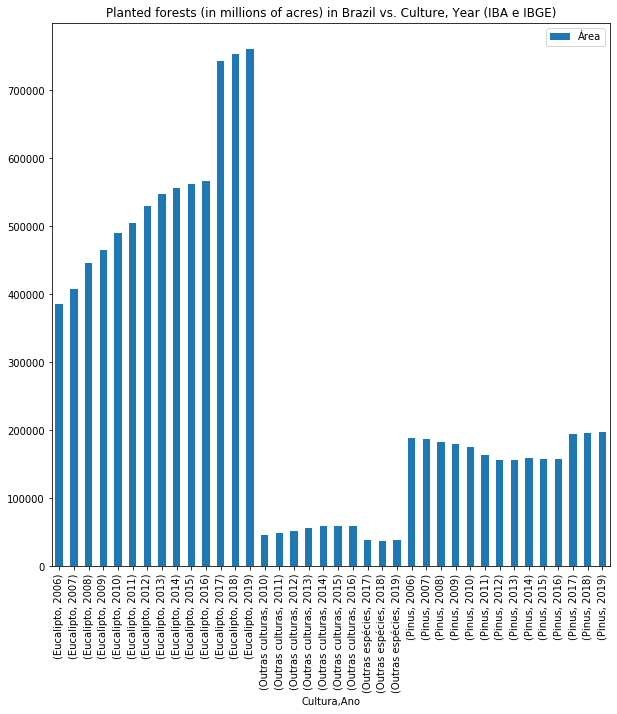

In [37]:
summarizeDataByCultureAndYear(data_IBA_and_IBGE, 'IBA e IBGE')

Time Series Analysis: planted forests in Brazil (IBA e IBGE):


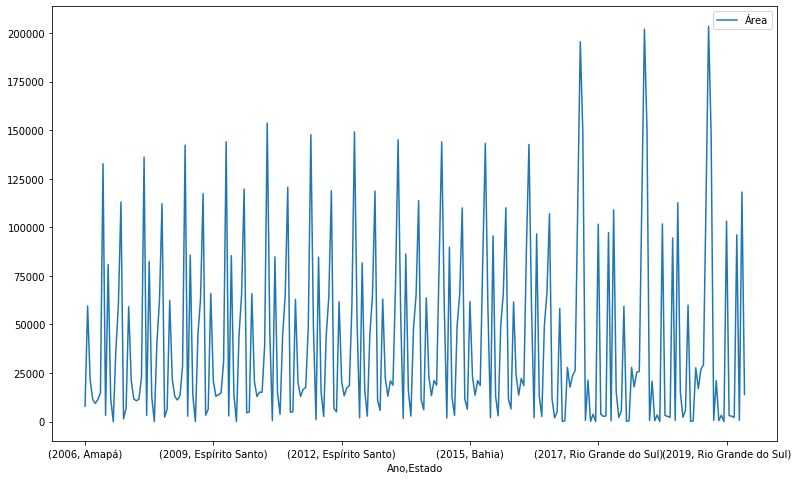

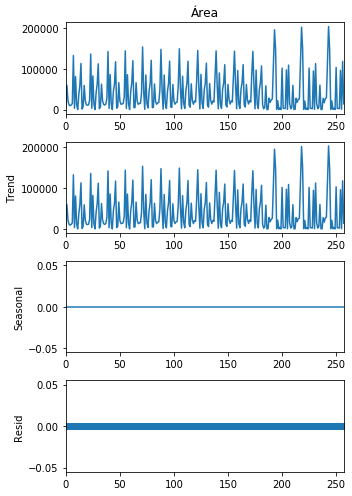

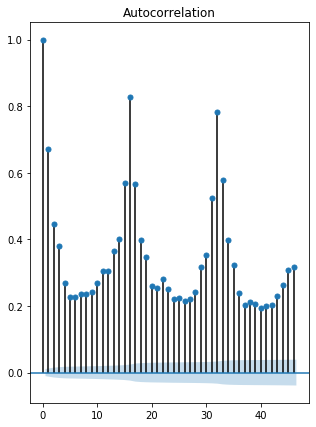

In [38]:
getTimeSeries(data_IBA_and_IBGE, 'IBA e IBGE')

According to achieved EDA, we can note that:


1. In accordance with IBA, in 10 years (from 2006 to 2016), there was the planting of more than 77 millions acres of forests in Brazil.
2. In accordance with IBGE, in 6 years (from 2013 to 2019), there was the planting of more than 67 millions acres of forests in Brazil.
3. States as Minas Gerais, São Paulo, Paraná, and Santa Catarina (regions from Southeast and South of Brazil) are between those it makes more forests planting.
4. In general, there is more planting as we progress out of time (see first bar plot and time series decomposition). This tendency of growth implies that the studied series is not stationary.
5. Accordingly to autocorrelation plot, we can note that more than 2 points (or > 5%) of the window are out of confidence interval for correlation equals to zero (shaded in blue), meaning high correlation between the values of planted areas.
6. Still on the autocorrelation chart, it can see up to 2 points (as in windows 1 and 2) with positive autocorrelation more than 0.4, therefore, a good guess is to analyze the series using 2 lags.
7. Eucalyptus is the most planted variety: it is realize the importance of this culture since it started planting forests in Brazil, in 1903.
8. The Pine planting started to fall in 2007, but grew back in 2012: it is perceived a strong demand of the industry and/or awareness of the involved parts in the planting of this culture.

# 4. Modelling - ARIMA

Forecast for the next years.

In [39]:
# seed for reproducibility
np.random.seed(42021)

Modelling using ARIMA (IBA e IBGE) - Area in Millions of Acres
---
Prediction = 785378.23, expected = 976378.30
Prediction = 984636.07, expected = 986495.00
Prediction = 1000609.89, expected = 998309.50
---
Testing RMSE: 110287.16
---
Prediction for 2020 (IBA e IBGE): 1001928.14
Prediction for 2021 (IBA e IBGE): 1002991.98
Prediction for 2022 (IBA e IBGE): 1003131.04


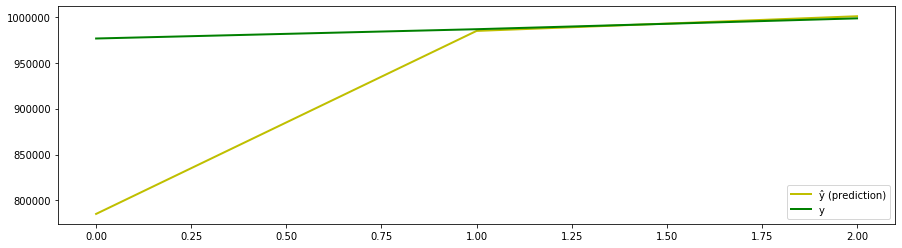

In [40]:
doARIMA(data_IBA_and_IBGE, 'IBA e IBGE', 2020, 2022)

# 5. Modelling - Linear Regression

Forecast for the next year.

Modelling using Linear Regression (IBA e IBGE) - Area in Millions of Acres
---
Cross-validation, -RMSE:
Fold 0 = -65652.08
Fold 1 = -3050.66
Fold 2 = -9460.54
---
Prediction = 794284.39, expected = 976378.30
Prediction = 962076.46, expected = 986495.00
Prediction = 970934.67, expected = 998309.50
---
Forecast for 2020 (IBA e IBGE): 957310.00


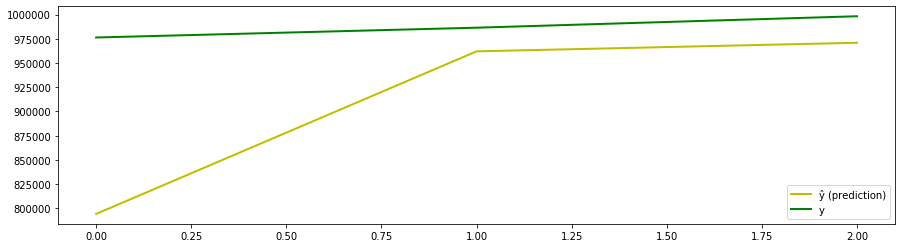

In [41]:
doLinearRegression(data_IBA_and_IBGE, 'IBA e IBGE')

# 6. Conclusions

The planted forests in Brazil are important and necessary for its development. Due to the high demand and greater citizens awareness, we see an increase in areas of planted forests every year. Several cultures (forest species) are going planted and used as source of production in many sectors of the society. Consequently elapses:

1. The forecast for the next years is of an estimated increase of 0.1% per year, reaching out, in 2020, the 100 millions acres of planted forests in Brazil mark (since 2006).

2. The linear regression model do not get an increase for 2020 due to difficulties to conceive a time window, or lags, befitting with a satisfyingly small error during training phase.

3. See previous topic, it was observed that ARIMA model, besides having minor error, gave us the main conclusions discussed here. Therefore, we can say that there is a growth of the planted forests, mainly Eucalyptus and Pine, in the South and Southeast of Brazil, led by: Minas Gerais, São Paulo, and Paraná

**Forecast for the next years:**

2020: 100.192.595 acres.

2021: 100.298.950 acres.

2022: 100.312.850 acres.

# 7. References

<span id="ref1"> 1. [Florestas Plantadas e as suas Principais Contribuições!](https://agropos.com.br/florestas-plantadas/) </span>

<span id="ref2"> 2. [Retrato atual das florestas no mundo](https://www.agroplanning.com.br/2020/07/28/retrato-atual-das-florestas-no-mundo/) </span>

<span id="ref3"> 3. [Florestas Plantadas - Sistema Nacional de Informações Florestais](https://snif.florestal.gov.br/pt-br/florestas-plantadas) </span>

<span id="ref4"> 4. [Plano Nacional de Desenvolvimento de Florestas Plantadas](https://www.gov.br/agricultura/pt-br/assuntos/politica-agricola/outras-publicacoes/plano-nacional-de-desenvolvimento-de-florestas-plantadas.pdf) </span>

# Functions utilized in this project

In [24]:
# plot map of Brazil planted forests
# @data: data_IBA or data_IBGE or data_IBA_and_IBGE
# @data_name: 'IBA' or 'IBGE' or 'IBA e IBGE'    
def getBrazilMap(data, data_name):
    if (data_name == 'IBA'):
        years_to_study = '2006~2016'
    elif (data_name == 'IBGE'):
        years_to_study = '2013~2019'
    else:
        years_to_study = '2006~2019'
            
    data_per_state = data.groupby(by=['Estado']).sum()
    data_per_state = data_per_state.reset_index(level=0)
    
    columns_Brazil = ['NAME_1']
    df_Brazil_map = pd.read_csv('BRA_adm1.csv', usecols=columns_Brazil)
    df_Brazil_map.columns = ['Estado']
    
    df_merged = pd.merge(df_Brazil_map, data_per_state, how='outer', on=['Estado'])
    df_merged = df_merged.fillna(0)
    
    map_source = 'BRA_adm1.shp'

    map_df = gpd.read_file(map_source)

    map_merged = map_df.join(df_merged)
    map_merged = map_merged.dropna()
    df_merged = df_merged[['Estado', 'Área']]
    
    vmin = 0
    vmax = max(data_per_state['Área'])

    fig, ax = plt.subplots(1, figsize=(30, 10))
    
    graph_title = 'Planted Forests in Brazil %s, %s (in millions of acres)' % (years_to_study, data_name)

    ax.set_title(graph_title, fontdict={'fontsize': '18', 'fontweight' : '3'})
    ax.axis('off')
    sm = plt.cm.ScalarMappable(cmap='Greens',norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    fig.colorbar(sm)
    
    # "Não informado" and "Outros" are ignored
    map_merged.plot(column='Área', cmap='Greens', linewidth=0.7, ax=ax, edgecolor='0.7')

In [25]:
# show planted forests data, by year
# @data: data_IBA or data_IBGE or data_IBA_and_IBGE
# @data_name: 'IBA' or 'IBGE' or 'IBA e IBGE' 
def summarizeDataByYear(data, data_name):
    print('Planted forests in Brazil: Area, in millions of acres, per Year (%s)' % data_name)
    data_by_year = data.groupby(by=['Ano']).sum()
    data_by_year.loc['Grand Total'] = data_by_year.sum()
    print(data_by_year)
    
    # plot data
    print('---')
    graph_title = title='Planted forests (in millions of acres) in Brazil vs. Year (%s)' % data_name
    data.groupby(by=['Ano']).sum().plot.bar(title=graph_title, legend='best', figsize=(10,10))

In [26]:
# show planted forests data, by culture
# @data: data_IBA or data_IBGE or data_IBA_and_IBGE
# @data_name: 'IBA' or 'IBGE' or 'IBA e IBGE' 
def summarizeDataByCulture(data, data_name):
    print('Planted forests in Brazil: Area, in millions of acres, per Culture (%s)' % data_name)
    data_culture = data[['Área', 'Cultura']]
    data_by_culture = data_culture.groupby(by=['Cultura']).sum()
    data_by_culture.loc['Grand Total'] = data_by_culture.sum()
    print(data_by_culture)
    
    # plot data
    print('---')
    graph_title = title='Planted forests in Brazil (in millions of acres) in Brazil vs. Culture (%s)' % data_name
    data_culture.groupby(by=['Cultura']).sum().plot.bar(title=graph_title, legend='best', figsize=(10,10))

In [27]:
# show planted forests data, by state
# @data: data_IBA or data_IBGE or data_IBA_and_IBGE
# @data_name: 'IBA' or 'IBGE' or 'IBA e IBGE' 
def summarizeDataByState(data, data_name):
    print('Planted forests in Brazil: Area, in millions of acres, per State (%s)' % data_name)
    data_state = data[['Estado', 'Área']]
    data_by_state = data_state.groupby(by=['Estado']).sum()
    data_by_state.loc['Grand Total'] = data_by_state.sum()
    print(data_by_state.sort_values('Área'))
    
    # plot data
    print('---')
    graph_title = title='Planted forests (in millions of acres) in Brazil vs. State (%s)' % data_name
    data_state.groupby(by=['Estado']).sum().plot.bar(title=graph_title, legend='best', figsize=(10,10))

In [28]:
# show planted forests data, by culture and year
# @data: data_IBA or data_IBGE or data_IBA_and_IBGE
# @data_name: 'IBA' or 'IBGE' or 'IBA e IBGE' 
def summarizeDataByCultureAndYear(data, data_name):
    print('Planted forests in Brazil: Area, in millions of acres, per Culture and Year (%s)' % data_name)
    data_culture_year = data[['Área', 'Cultura', 'Ano']]
    data_by_culture_and_year = data_culture_year.groupby(by=['Cultura', 'Ano']).sum()
    data_by_culture_and_year.loc['Grand Total'] = data_by_culture_and_year.sum()
    print(data_by_culture_and_year)
    
    # plot data
    print('---')
    graph_title = title='Planted forests (in millions of acres) in Brazil vs. Culture, Year (%s)' % data_name
    data_culture_year.groupby(by=['Cultura', 'Ano']).sum().plot.bar(title=graph_title, legend=True, figsize=(10,10))

In [29]:
# Perform time series analysis
# @data: data_IBA or data_IBGE or data_IBA_and_IBGE 
# @data_name: 'IBA' or 'IBGE' or 'IBA e IBGE'
def getTimeSeries(data, data_name):
    print('Time Series Analysis: planted forests in Brazil (%s):' % data_name)
    
    data_series = data.copy()
    data_series.set_index('Estado', inplace=True)
    
    data_series_state = data_series.groupby(by=['Ano', 'Estado']).sum()
    
    data_series_year_and_state = data_series_state.reset_index(level=[0,1])
    data_series_year_and_state.head(20)
    
    data_series_year_and_state.sort_values(by=['Ano', 'Estado'])
    data_series_year_and_state.groupby(by=['Ano', 'Estado']).sum().plot(legend=True, figsize=(13,8))
    
    # period, here, is each one observation (year, state)
    decompostion = seasonal_decompose(data_series_year_and_state['Área'], period = 1)
    decompostion.plot()
    plt.rcParams["figure.figsize"] = (5,7)
    plt.show()

    # autocorrelation, lag = 50 for IBA and IBGE
    # value of 0 = no correlation

    plot_acf(data_series[['Área']])
    plt.show()

In [30]:
# Perform time series analysis
# @data: data_IBA or data_IBGE or data_IBA_and_IBGE 
# @data_name: 'IBA' or 'IBGE' or 'IBA e IBGE'
# @start_index: a year to predict
# @end_index: predict until this year
def doARIMA(data, data_name, start_index, end_index):
    print('Modelling using ARIMA (%s) - Area in Millions of Acres' % data_name)
    print('---')
    
    # prepare dataframe for time series forecasting
    data_by_year = data.groupby(by=['Ano']).sum()
    data_by_year.loc['Grand Total'] = data_by_year.sum()
    series_FULL = pd.DataFrame(data_by_year)
    series_FULL = series_FULL.reset_index(level=0)
    series_FULL.drop(series_FULL.tail(1).index,inplace=True)
    series_FULL['Ano'] = pd.to_datetime(series_FULL['Ano'], format="%Y")
    
    # split data to train/test
    X = series_FULL[['Área']]
    X.index = pd.DatetimeIndex(series_FULL['Ano'])
    X.index.freq = 'AS-JAN'
    
    X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)
    history = [x for x in X_train['Área']]
    y = [x for x in X_test['Área']]
    FULL_ARIMA_predictions = list()
    
    # fit model 1 - AutoRegressive Integrated Moving Average (ARIMA), lags = 2, window = 1
    for t in range(len(X_test)):
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        FULL_ARIMA_predictions.append(yhat)
        history.append(y[t])
        print('Prediction = %.2f, expected = %.2f' % (yhat, y[t]))

    # evaluate forecasts (RMSE)
    rmse = sqrt(mean_squared_error(y, FULL_ARIMA_predictions))
    print('---')
    print('Testing RMSE: %.2f' % rmse)

    # plot forecasts vs. actual outcomes
    plt.figure(figsize=(15,4))
    plt.plot(FULL_ARIMA_predictions, "y", label="ŷ (prediction)", linewidth=2.0)
    plt.plot(y, "g", label="y", linewidth=2.0)
    plt.legend(loc="best")

    # predict with model 1 (ARIMA)
    forecast = model_fit.forecast(steps = end_index - start_index + 2)

    print('---')
    for year in range (end_index - start_index + 2):
        if year > 0:
            print('Prediction for %i (%s): %.2f' % (start_index + year - 1, data_name, forecast[year]))

In [31]:
# Perform time series analysis
# @data: data_IBA or data_IBGE or data_IBA_and_IBGE 
# @data_name: 'IBA' or 'IBGE' or 'IBA e IBGE'
def doLinearRegression(data, data_name):
    print('Modelling using Linear Regression (%s) - Area in Millions of Acres' % data_name)
    print('---')
    
    # prepare dataframe for time series forecasting
    data_by_year = data.groupby(by=['Ano']).sum()
    data_by_year.loc['Grand Total'] = data_by_year.sum()
    series_FULL = pd.DataFrame(data_by_year)
    series_FULL = series_FULL.reset_index(level=0)
    series_FULL.drop(series_FULL.tail(1).index,inplace=True)
    series_FULL['Ano'] = pd.to_datetime(series_FULL['Ano'], format="%Y")
    series_FULL_LR = series_FULL

    # adjust the data according n_lags
    n_lags = 2
    for i in reversed(range(0, n_lags)):
        series_FULL_LR["lag_{}".format(i)] = series_FULL[['Área']].shift(i)

    # split data to train/test
    X = series_FULL_LR.dropna().drop(['Ano'], axis=1)
    X = X.iloc[:,1:]

    y = X.iloc[:,-1:]

    X = X.reset_index(drop=True)
    X = X.drop(X.columns[-1], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # LR fit
    model = LinearRegression()
    model.fit(X_train, y_train)

    # cross validation estimation error (training step)
    folds = 3
    ts_cross_val = TimeSeriesSplit(n_splits=folds)

    cv = cross_val_score(model, X_train, y_train, cv = ts_cross_val, scoring= "neg_root_mean_squared_error")

    print('Cross-validation, -RMSE:')
    for f in range (folds):
        print('Fold %d = %.2f' % (f, cv[f]))
    
    # prediction step
    FULL_LR_predictions = model.predict(X_test)

    print('---')
    for i in range(0, FULL_LR_predictions.shape[0]):
        pred = FULL_LR_predictions[i, 0]
        print('Prediction = %.2f, expected = %.2f' % (pred, y_test.iloc[i][y_test.columns[-1]]))

    # plot forecasts vs. actual outcomes
    plt.figure(figsize=(15,4))
    plt.plot(FULL_LR_predictions, "y", label="ŷ (prediction)", linewidth=2.0)
    plt.plot(y_test.values, "g", label="y", linewidth=2.0)
    plt.legend(loc="best")

    # predict the next year (2020 for IBA + IBGE data)
    print('---')
    year_to_predict = 2020

    last_lag = [ [pred] ]
    y_pred = model.predict(last_lag)
    print('Forecast for %i (%s): %.2f' % (year_to_predict, data_name, y_pred[0]))